In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.linear_model import RidgeCV


In [2]:
data = pd.read_csv(r'C:\Users\رغد\Desktop\MS\ML\Ass1\student-mat.csv', sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data=data[['G1','G2','G3','studytime','failures','absences']]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [4]:
data.shape

(395, 6)

In [5]:
data.describe()

,G1,G2,G3,studytime,failures,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190,2.035443,0.334177,5.708861
std,3.319195,3.761505,4.581443,0.839240,0.743651,8.003096
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000,1.000000,0.000000,0.000000
50%,11.000000,11.000000,11.000000,2.000000,0.000000,4.000000
75%,13.000000,13.000000,14.000000,2.000000,0.000000,8.000000
max,19.000000,19.000000,20.000000,4.000000,3.000000,75.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   studytime  395 non-null    int64
 4   failures   395 non-null    int64
 5   absences   395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [7]:
data_sort=data.sort_values(by='G3',ascending=False)
print(data_sort)

     G1  G2  G3  studytime  failures  absences
47   19  19  20          4         0         4
113  18  19  19          1         0        10
110  18  19  19          1         0         6
286  18  18  19          3         0         5
8    16  18  19          2         0         0
..   ..  ..  ..        ...       ...       ...
160   7   6   0          1         2         0
162   7   0   0          1         1         0
168   6   7   0          2         0         0
367   7   6   0          1         1         0
150   6   5   0          1         3         0

[395 rows x 6 columns]


array([[<AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>],
       [<AxesSubplot:title={'center':'G3'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'absences'}>]], dtype=object)

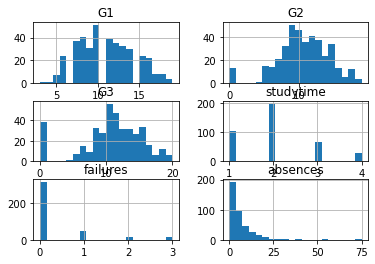

In [8]:
#plt.hist(data)  
#plt.xlabel('Intervals')  
#plt.ylabel('Value')  
#plt.title('Distribution of the variable x')  
#plt.show()  
data.hist(bins=20)

array([[<AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>],
       [<AxesSubplot:title={'center':'G3'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'absences'}>]], dtype=object)

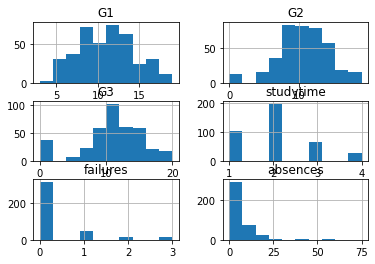

In [9]:
data.hist(bins=10)

In [10]:
data.corr()


,G1,G2,G3,studytime,failures,absences
G1,1.000000,0.852118,0.801468,0.160612,-0.354718,-0.031003
G2,0.852118,1.000000,0.904868,0.135880,-0.355896,-0.031777
G3,0.801468,0.904868,1.000000,0.097820,-0.360415,0.034247
studytime,0.160612,0.135880,0.097820,1.000000,-0.173563,-0.062700
failures,-0.354718,-0.355896,-0.360415,-0.173563,1.000000,0.063726
absences,-0.031003,-0.031777,0.034247,-0.062700,0.063726,1.000000


In [11]:
data_corr=data.corr()['G3']
print(data_corr)

G1           0.801468
G2           0.904868
G3           1.000000
studytime    0.097820
failures    -0.360415
absences     0.034247
Name: G3, dtype: float64


<AxesSubplot:>

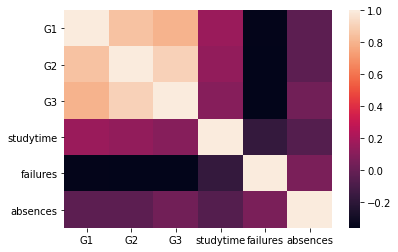

In [12]:
sns.heatmap(data.corr())


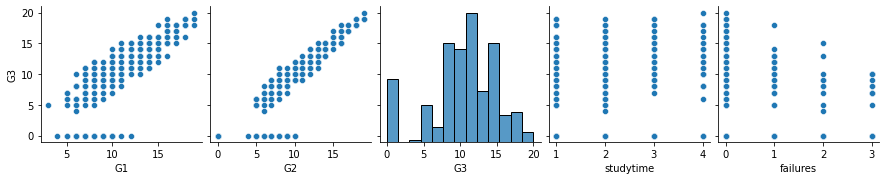

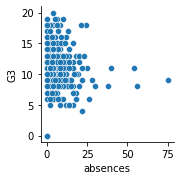

In [13]:
for i in range(0,len(data.columns),5):
    sns.pairplot(data,y_vars=['G3'], x_vars=data.columns[i:i+5])

<AxesSubplot:xlabel='G1', ylabel='G3'>

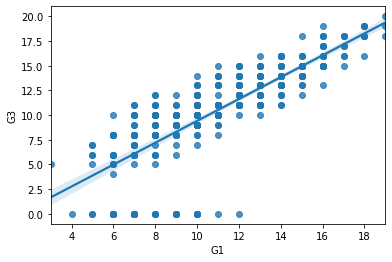

In [14]:

    sns.regplot(x='G1',y='G3',data=data)
   
    


<AxesSubplot:xlabel='G2', ylabel='G3'>

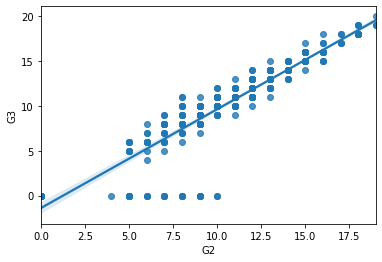

In [15]:
 sns.regplot(x='G2',y='G3',data=data)
   

<AxesSubplot:xlabel='studytime', ylabel='G3'>

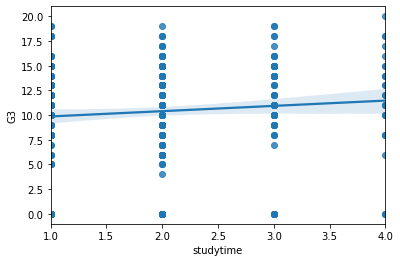

In [16]:
 sns.regplot(x='studytime',y='G3',data=data)
   

<AxesSubplot:xlabel='absences', ylabel='G3'>

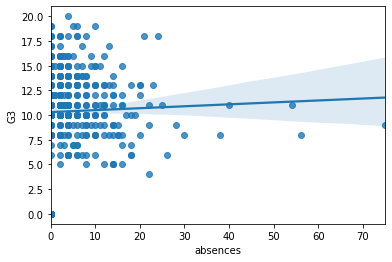

In [17]:
 sns.regplot(x='absences',y='G3',data=data)
    

<AxesSubplot:xlabel='failures', ylabel='G3'>

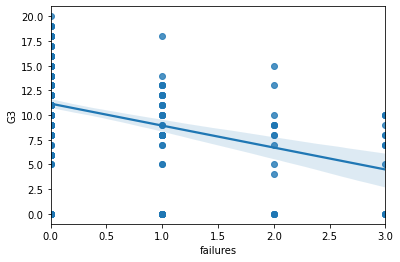

In [18]:
sns.regplot(x='failures',y='G3',data=data)

In [19]:
predict = "G3"
X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

In [20]:
print(X[:,:])
print(y[:])

[[ 5  6  2  0  6]
 [ 5  5  2  0  4]
 [ 7  8  2  3 10]
 ...
 [10  8  1  3  3]
 [11 12  1  0  0]
 [ 8  9  1  0  5]]
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 17 10 11 10  0  9 14 11 14 10 12  9  9  8 10  8 10 12 10 11 11 19 12
 14 15 11 

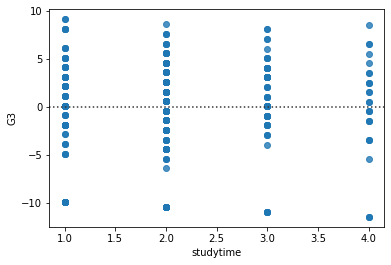

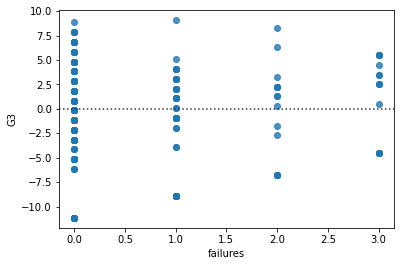

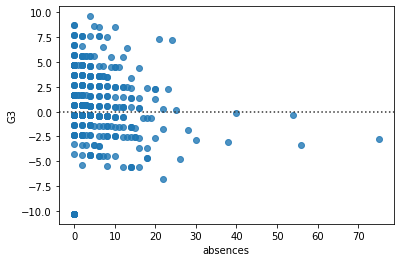

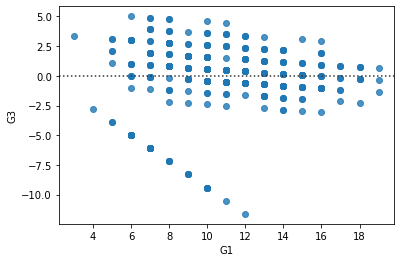

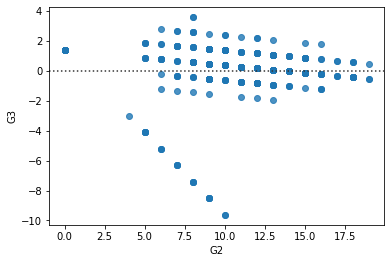

In [176]:
sns.residplot(x = 'studytime',
              y = 'G3',
              data = data)
plt.show()

sns.residplot(x = 'failures',
              y = 'G3',
              data = data)
plt.show()

sns.residplot(x = 'absences',
              y = 'G3',
              data = data)
plt.show()

sns.residplot(x = 'G1',
              y = 'G3',
              data = data)
plt.show()

sns.residplot(x = 'G2',
              y = 'G3',
              data = data)
plt.show()

In [46]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((316, 5), (79, 5), (316,), (79,))

In [48]:
print(x_train[:,:])
print(y_train[:])
print(x_test[:,:])
print(y_test[:])

[[ 6 10  2  0  4]
 [ 9  8  2  1 16]
 [15 12  3  0  0]
 ...
 [14 14  1  0  4]
 [ 8  8  2  0  0]
 [12 11  2  0  2]]
[10  7 14  9 18  0 15 10 14 10 14 11 13 12  8  8 10 18 13  9  9 13 12  9
  0 14 10 12 12 10 12 19  0 10  8  6 18 11  9 10 14  0 13 15  0 16  0 16
  9  9  8 14  6 11 14 10 15 10 10  0  5 13 13  0 11 11 16  9  9 12  5 10
  8 14 10 10 11  0 16  6  5 11  0  6  0 15  0 18  0 20 13 16 13 12 12 10
  7 10  6  7  0  0 10 11 11  8  8  9 10 14 10 11 10 15  9 10 15 11  6 14
 12 15 12 11 10 10 11 14 10  4 12 16 13 11  6 13 11 11 15  9 11 14  8  5
  8 15 14 12 10 15 13  0  8  7  5 10  9 11 11 12  0 12 12 15  8  8 18 12
 12  0 18 11 18 14 14  6 16 12 13 13 12 11  0  9 13 17 13 10 16 10 18  0
  6 14 17 11  8 13 12 15 10 14  0 17  0 11 10 14 10  9 11  0  5 16 11 13
  9 11 11 18 11 12 15 16 11 12 15 15 10  0 12  9 15 13 19 15 13 15 13  0
 10 11 14 14 18  0 15 15  7 12 13  8 17 10 11  9 13  8 15 10 11  8 15 15
  6  8 11 14 10  9 19 12 11  9  0 11 15 13  0  9 11  0 10 14  8  9 18 10
 15  8 10 

In [49]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
#acc = linear.score(x_test, y_test) 
#print(acc)
print('Coefficient: \n', linear.coef_) # These are each slope value
print('Intercept: \n', linear.intercept_) # This is the intercept

predictions = linear.predict(x_test) # Gets a list of all predictions

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

Coefficient: 
 [ 0.14831058  0.98064589 -0.13966959 -0.35358459  0.03192411]
Intercept: 
 -1.4975727033509987
6.401790397511471 [8 7 2 0 4] 6
15.721422306087911 [17 15  1  0  4] 16
5.749054335292952 [5 8 2 3 0] 7
17.12736789779572 [16 17  3  0  0] 17
14.01983767048734 [13 14  1  0  0] 13
9.127254969191291 [11  9  2  0 14] 9
15.656910874943895 [16 15  2  0 11] 15
11.984730253914416 [10 12  2  0 16] 11
7.08248294778806 [7 8 4 0 8] 8
5.058255704272762 [ 6  6  2  1 13] 8
8.027692302361343 [ 9  9  2  2 11] 9
16.434702182026733 [17 16  2  0  0] 16
15.305745714644244 [16 15  2  0  0] 15
12.05854589991632 [13 12  1  0  0] 12
15.072972761413856 [14 15  2  0  2] 15
9.64034921756196 [10 10  2  0  4] 10
5.468733040152671 [8 7 2 3 8] 8
15.009124550450286 [14 15  2  0  0] 16
6.283647708281057 [8 7 1 1 7] 8
-0.4507576339947017 [8 0 1 0 0] 0
14.23199646354789 [14 14  1  0  2] 13
8.03011173515701 [9 9 2 1 0] 0
9.738790484641832 [ 8 10  1  0 12] 10
10.617662932032509 [11 11  4  0  8] 10
5.06067513706842

In [190]:
print('Evaluation for sklearn model\n')

#Explained variance score
print('Explained variance score:')
print(explained_variance_score(y_test, predictions),'\n')

#max error
print('Max error:')
print(max_error(y_test, predictions),'\n')

#Mean absolute error
print('Mean absolute error:')
print(mean_absolute_error(y_test, predictions),'\n')

#Mean squared error
print('Mean squared error:')
print(mean_squared_error(y_test, predictions),'\n')

#Root mean squared error
print('Root mean squared error:')
print(mean_squared_error(y_test, predictions, squared=False),'\n')

#Median absolute error
print('Median absolute error:')
print(median_absolute_error(y_test, predictions),'\n')


#R² score
print('R² score:')
print(r2_score(y_test, predictions),'\n')

#Adjusted-R2
r2 = r2_score(y_test, predictions)
N=79
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)


Evaluation for sklearn model

Explained variance score:
0.8393804224807258 

Max error:
8.03011173515701 

Mean absolute error:
1.0696972693843856 

Mean squared error:
3.223718782132511 

Root mean squared error:
1.7954717436185152 

Median absolute error:
0.6535403254727079 

R² score:
0.8392904471659957 

Adjusted-R2 :  0.8282829435472282


In [182]:

def initialize_parameters(lenw):
    w=np.zeros((1,lenw))
    b=0
    return w,b


In [75]:
def straight_line(x,w,b):
    z=np.dot(w,x)+b
    return z

In [122]:
def cost_function1(z,y):
    m=y.shape[1]
    J=(1/(2*m))*np.sum(np.square(z-y))
    return J

In [123]:
def cost_function2(z,y):
    m=y.shape[1]
    J=(1/m)*np.sum(np.square(z-y))
    return J

In [124]:
def cost_function3(z,y):
    m=y.shape[1]
    J=(1/2)*np.sum(np.square(z-y))
    return J

In [77]:
def gradient(x,y,z):
    m=y.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,x.T)#dw-->1xn
    db=np.sum(dz)
    return dw,db
    

In [78]:
def update(w,b,dw,db,learning_rate):
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return w,b

In [121]:
def model1(x_trainT,y_trainT,learning_rate,iterations):  #cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    lenw=x_trainT.shape[0]
    w,b=initialize_parameters(lenw) #1
    
    costs_train=[]
    
    for i in range(iterations):
        z_train=straight_line(x_trainT,w,b)#2
        cost_train= cost_function1(z_train,y_trainT)#3
        dw,db=gradient(x_trainT,y_trainT,z_train)#4
        w,b=update(w,b,dw,db,learning_rate)#5
        
        costs_train.append(cost_train)
        
        # to print the cost for 10 times
        if(i%(iteration/10) == 0):
            print("Cost is :", cost_train)

        

        
    return w,b,costs_train
    

In [119]:
def model2(x_trainT,y_trainT,learning_rate,iterations):#cost = (1/m)*np.sum(np.square(y_pred - Y))
    lenw=x_trainT.shape[0]
    w,b=initialize_parameters(lenw) #1
    
    costs_train=[]
    
    for i in range(iterations):
        z_train=straight_line(x_trainT,w,b)#2
        cost_train= cost_function2(z_train,y_trainT)#3
        dw,db=gradient(x_trainT,y_trainT,z_train)#4
        w,b=update(w,b,dw,db,learning_rate)#5
        
        costs_train.append(cost_train)
        
        # to print the cost for 10 times
        if(i%(iteration/10) == 0):
            print("Cost is :", cost_train)

        

        
    return w,b,costs_train
    

In [118]:
def model3(x_trainT,y_trainT,learning_rate,iterations):   #cost = (1/2)*np.sum(np.square(y_pred - Y))
    lenw=x_trainT.shape[0]
    w,b=initialize_parameters(lenw) #1
    
    costs_train=[]
    
    for i in range(iterations):
        z_train=straight_line(x_trainT,w,b)#2
        cost_train= cost_function3(z_train,y_trainT)#3
        dw,db=gradient(x_trainT,y_trainT,z_train)#4
        w,b=update(w,b,dw,db,learning_rate)#5
        
        costs_train.append(cost_train)
        
        # to print the cost for 10 times
        if(i%(iteration/10) == 0):
            print("Cost is :", cost_train)

        

        
    return w,b,costs_train
    

In [57]:
x_trainT=x_train.T

In [58]:
x_trainT.shape

(5, 316)

In [59]:
y_trainT=np.array([y_train])

In [60]:
y_trainT.shape

(1, 316)

In [61]:
x_testT=x_test.T

In [62]:
x_testT.shape

(5, 79)

In [63]:
y_testT=np.array([y_test])

In [64]:
y_testT.shape

(1, 79)

Cost is : 66.03322784810126
Cost is : 2.381391356168956
Cost is : 2.2372122688100693
Cost is : 2.137910766281964
Cost is : 2.069070732292876
Cost is : 2.0209633109725065
Cost is : 1.987013748592603
Cost is : 1.9627725870018327
Cost is : 1.9452232914955947
Cost is : 1.9323161727401292


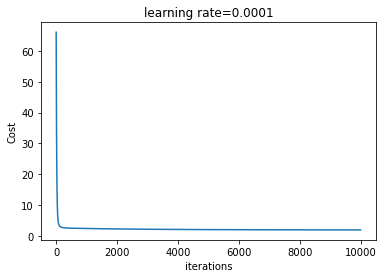

In [125]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.0001
iteration = 10000
learning_rate = 0.0001
w1,b1,costs_train1 = model1(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train1)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.0001')
plt.show()
#plt.plot(rng, costs_train)


Cost is : 66.03322784810126
Cost is : 1.9226035722319392
Cost is : 1.8885291869969016
Cost is : 1.8796508294286927
Cost is : 1.8750203931247817
Cost is : 1.871735644208808
Cost is : 1.8690196254022267
Cost is : 1.8666295812726335
Cost is : 1.8644781901929106
Cost is : 1.8625261712230123


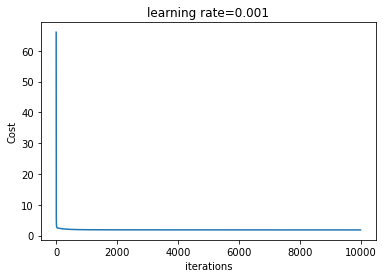

In [151]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.001
iteration = 10000
learning_rate = 0.001
w2,b2,costs_train2 = model1(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train2)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.001')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 66.03322784810126


C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-122-8854b628dfa0>:3: RuntimeWarning: overflow encountered in square
  J=(1/(2*m))*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


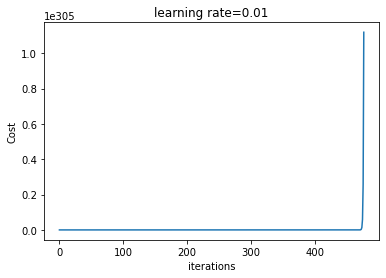

In [127]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.01
iteration = 10000
learning_rate = 0.01
w3,b3,costs_train3 = model1(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train3)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.01')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 66.03322784810126
Cost is : nan


<ipython-input-122-8854b628dfa0>:3: RuntimeWarning: overflow encountered in square
  J=(1/(2*m))*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


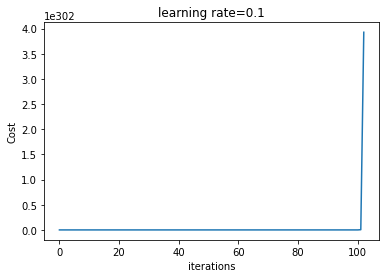

In [128]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.1
iteration = 10000
learning_rate = 0.1
w4,b4,costs_train4 = model1(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train4)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.1')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 66.03322784810126
Cost is : nan


<ipython-input-122-8854b628dfa0>:3: RuntimeWarning: overflow encountered in square
  J=(1/(2*m))*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


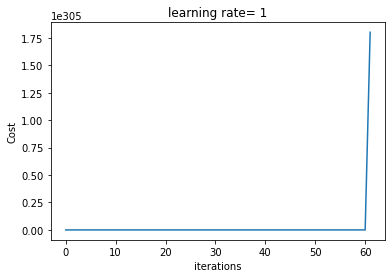

In [129]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=1
iteration = 10000
learning_rate =1
w5,b5,costs_train5 = model1(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train5)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 1')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 66.03322784810126
Cost is : nan


<ipython-input-122-8854b628dfa0>:3: RuntimeWarning: overflow encountered in square
  J=(1/(2*m))*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


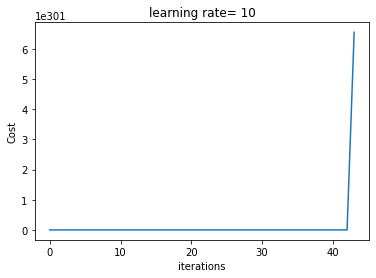

In [130]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=10
iteration = 10000
learning_rate =10
w6,b6,costs_train6 = model1(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train6)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 10')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 66.03322784810126
Cost is : nan


<ipython-input-122-8854b628dfa0>:3: RuntimeWarning: overflow encountered in square
  J=(1/(2*m))*np.sum(np.square(z-y))
<ipython-input-78-38d1673ecc85>:2: RuntimeWarning: overflow encountered in multiply
  w=w-learning_rate*dw
<ipython-input-78-38d1673ecc85>:3: RuntimeWarning: overflow encountered in double_scalars
  b=b-learning_rate*db


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


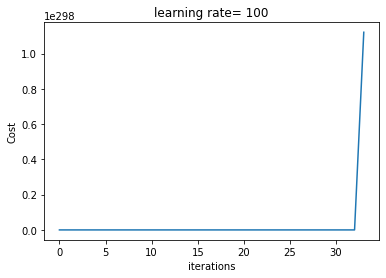

In [131]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=100
iteration = 10000
learning_rate =100
w7,b7,costs_train7 = model1(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train7)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 100')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 132.06645569620252
Cost is : 4.762782712337912
Cost is : 4.474424537620139
Cost is : 4.275821532563928
Cost is : 4.138141464585752
Cost is : 4.041926621945013
Cost is : 3.974027497185206
Cost is : 3.9255451740036653
Cost is : 3.8904465829911894
Cost is : 3.8646323454802585


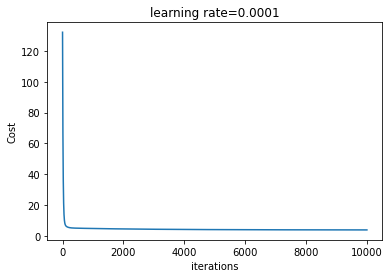

In [132]:
#cost = (1/m)*np.sum(np.square(y_pred - Y)) and learning rate=0.0001
iteration = 10000
learning_rate = 0.0001
w11,b11,costs_train11 = model2(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train11)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.0001')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 132.06645569620252
Cost is : 3.8452071444638785
Cost is : 3.7770583739938033
Cost is : 3.7593016588573853
Cost is : 3.7500407862495635
Cost is : 3.743471288417616
Cost is : 3.7380392508044533
Cost is : 3.733259162545267
Cost is : 3.7289563803858212
Cost is : 3.7250523424460247


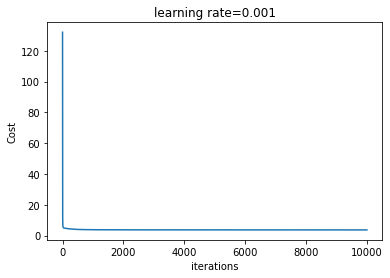

In [133]:
#cost = (1/m)*np.sum(np.square(y_pred - Y)) and learning rate=0.001
iteration = 10000
learning_rate = 0.001
w22,b22,costs_train22 = model2(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train22)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.001')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 132.06645569620252
Cost is : nan


<ipython-input-123-6045ea03e090>:3: RuntimeWarning: overflow encountered in square
  J=(1/m)*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


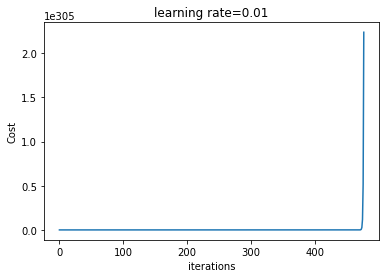

In [134]:
#cost = (1/m)*np.sum(np.square(y_pred - Y)) and learning rate=0.01
iteration = 10000
learning_rate = 0.01
w33,b33,costs_train33 = model2(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train33)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.01')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 132.06645569620252
Cost is : nan


<ipython-input-123-6045ea03e090>:3: RuntimeWarning: overflow encountered in square
  J=(1/m)*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


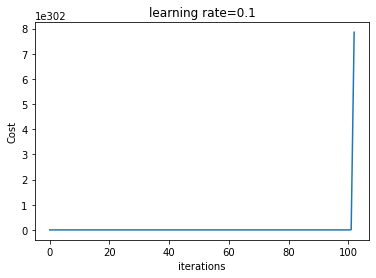

In [135]:
#cost = (1/m)*np.sum(np.square(y_pred - Y)) and learning rate=0.1
iteration = 10000
learning_rate = 0.1
w44,b44,costs_train44 = model2(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train44)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.1')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 132.06645569620252
Cost is : nan


<ipython-input-123-6045ea03e090>:3: RuntimeWarning: overflow encountered in square
  J=(1/m)*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


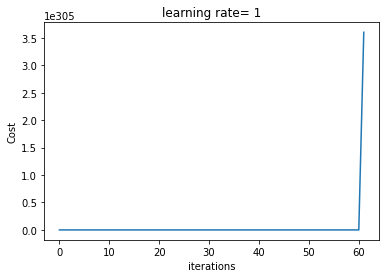

In [136]:
#cost = (1/m)*np.sum(np.square(y_pred - Y)) and learning rate=1
iteration = 10000
learning_rate =1
w55,b55,costs_train55 = model2(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train55)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 1')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 132.06645569620252
Cost is : nan


<ipython-input-123-6045ea03e090>:3: RuntimeWarning: overflow encountered in square
  J=(1/m)*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


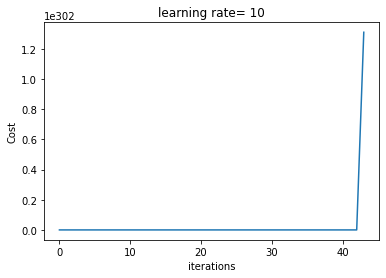

In [137]:
#cost = (1/m)*np.sum(np.square(y_pred - Y)) and learning rate=10
iteration = 10000
learning_rate =10
w66,b66,costs_train66 = model2(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train66)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 10')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 132.06645569620252
Cost is : nan


<ipython-input-123-6045ea03e090>:3: RuntimeWarning: overflow encountered in square
  J=(1/m)*np.sum(np.square(z-y))
<ipython-input-78-38d1673ecc85>:2: RuntimeWarning: overflow encountered in multiply
  w=w-learning_rate*dw
<ipython-input-78-38d1673ecc85>:3: RuntimeWarning: overflow encountered in double_scalars
  b=b-learning_rate*db


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


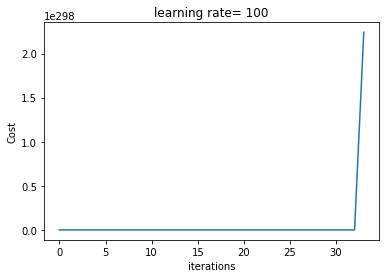

In [138]:
#cost = (1/m)*np.sum(np.square(y_pred - Y)) and learning rate=100
iteration = 10000
learning_rate =100
w77,b77,costs_train77 = model2(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train77)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 100')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 20866.5
Cost is : 752.5196685493901
Cost is : 706.9590769439819
Cost is : 675.5798021451005
Cost is : 653.8263514045489
Cost is : 638.6244062673121
Cost is : 627.8963445552625
Cost is : 620.2361374925791
Cost is : 614.690560112608
Cost is : 610.6119105858809


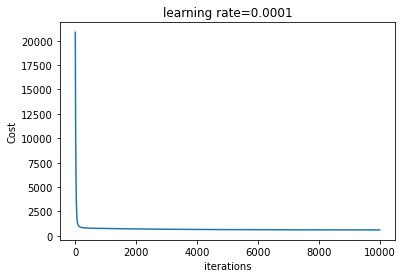

In [139]:
#cost = (1/2)*np.sum(np.square(y_pred - Y)) and learning rate=0.0001
iteration = 10000
learning_rate = 0.0001
w111,b111,costs_train111 = model3(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train111)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.0001')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 20866.5
Cost is : 607.5427288252928
Cost is : 596.775223091021
Cost is : 593.9696620994669
Cost is : 592.5064442274311
Cost is : 591.4684635699833
Cost is : 590.6102016271036
Cost is : 589.8549476821522
Cost is : 589.1751081009597
Cost is : 588.5582701064719


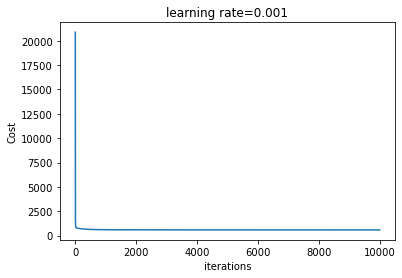

In [140]:
#cost = (1/2)*np.sum(np.square(y_pred - Y)) and learning rate=0.001
iteration = 10000
learning_rate = 0.001
w222,b222,costs_train222 = model3(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train222)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.001')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 20866.5
Cost is : nan


<ipython-input-124-799559b5bd4a>:3: RuntimeWarning: overflow encountered in square
  J=(1/2)*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


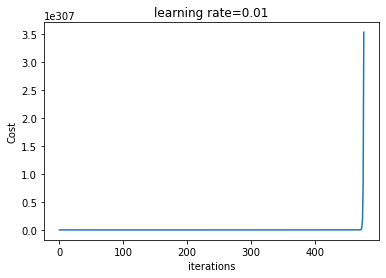

In [141]:
#cost = (1/2)*np.sum(np.square(y_pred - Y)) and learning rate=0.01
iteration = 10000
learning_rate = 0.01
w333,b333,costs_train333 = model3(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train333)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.01')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 20866.5
Cost is : nan


<ipython-input-124-799559b5bd4a>:3: RuntimeWarning: overflow encountered in square
  J=(1/2)*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


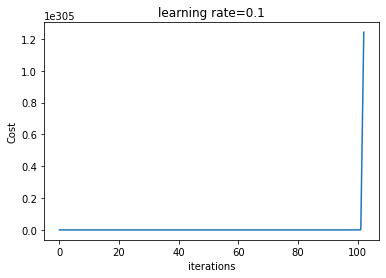

In [142]:
#cost = (1/2)*np.sum(np.square(y_pred - Y)) and learning rate=0.1
iteration = 10000
learning_rate = 0.1
w444,b444,costs_train444 = model3(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train444)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate=0.1')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 20866.5
Cost is : nan


<ipython-input-124-799559b5bd4a>:3: RuntimeWarning: overflow encountered in square
  J=(1/2)*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


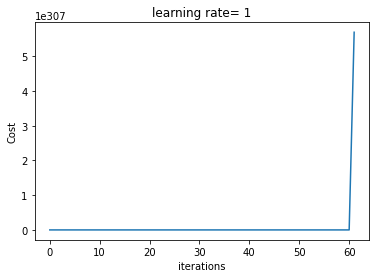

In [144]:
#cost = (1/2)*np.sum(np.square(y_pred - Y)) and learning rate=1
iteration = 10000
learning_rate =1
w555,b555,costs_train555 = model3(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train555)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 1')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 20866.5
Cost is : nan


<ipython-input-124-799559b5bd4a>:3: RuntimeWarning: overflow encountered in square
  J=(1/2)*np.sum(np.square(z-y))


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


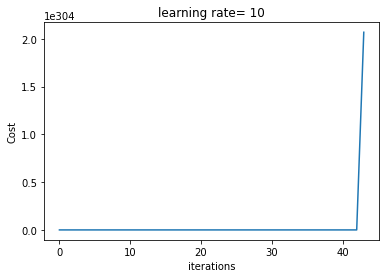

In [145]:
#cost = (1/2)*np.sum(np.square(y_pred - Y)) and learning rate=10
iteration = 10000
learning_rate =10
w666,b666,costs_train666 = model3(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train666)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 10')
plt.show()
#plt.plot(rng, costs_train)

Cost is : 20866.5
Cost is : nan


<ipython-input-124-799559b5bd4a>:3: RuntimeWarning: overflow encountered in square
  J=(1/2)*np.sum(np.square(z-y))
<ipython-input-78-38d1673ecc85>:2: RuntimeWarning: overflow encountered in multiply
  w=w-learning_rate*dw
<ipython-input-78-38d1673ecc85>:3: RuntimeWarning: overflow encountered in double_scalars
  b=b-learning_rate*db


Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan
Cost is : nan


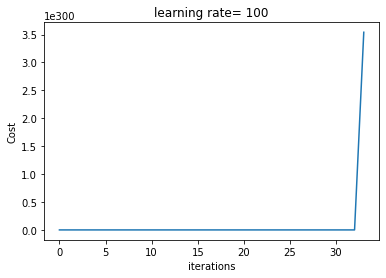

In [146]:
#cost = (1/2)*np.sum(np.square(y_pred - Y)) and learning rate=100
iteration = 10000
learning_rate =100
w777,b777,costs_train777 = model3(x_trainT, y_trainT, learning_rate = learning_rate, iterations =
iteration)

#print(w.shape)
#print(b)

#rng = np.arange(0, iteration)
plt.plot(costs_train777)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('learning rate= 100')
plt.show()
#plt.plot(rng, costs_train)

In [158]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.0001
y_pred1 =straight_line(x_testT,w1,b1)

In [159]:
y_pred1

array([[ 6.85991735, 15.42055301,  6.53470369, 16.65593327, 13.98415943,
         9.23315007, 15.24590511, 11.93276807,  7.33656128,  5.62496254,
         8.3946777 , 16.05140265, 15.02104109, 12.13961183, 14.84574994,
         9.84291427,  6.10023064, 14.80486557,  6.85041418,  0.53188745,
        14.13313156,  8.45029882,  9.99993164, 10.53573372,  5.68058366,
         9.8020299 ,  0.31571193,  9.83405435,  9.83639417,  4.22728493,
        13.33351087,  7.74130678,  8.99588911, 15.22546293,  7.70042241,
         0.53840755,  5.65426464, 14.79834547,  8.12101978,  6.58305854,
         3.55192458, 10.06479522, 14.154217  ,  6.0596534 , 12.98292856,
        17.90247035, 10.01168532, 10.64317822,  8.85343708,  6.5881207 ,
        11.82186865, 15.51748395, 12.07240844,  8.66358058, 12.67693906,
        12.89311458, 10.24242619, 12.64257479, 19.25862033,  6.56197309,
         6.79176358,  4.27621454,  5.93081633,  8.09529761,  9.76114553,
         8.70446495, 13.00120234, 11.9590871 , 13.1

In [160]:
y_pred1.shape

(1, 79)

In [161]:
for x in range(len(y_pred1)):
    print(y_pred1[x], x_testT[x], y_testT[x])

[ 6.85991735 15.42055301  6.53470369 16.65593327 13.98415943  9.23315007
 15.24590511 11.93276807  7.33656128  5.62496254  8.3946777  16.05140265
 15.02104109 12.13961183 14.84574994  9.84291427  6.10023064 14.80486557
  6.85041418  0.53188745 14.13313156  8.45029882  9.99993164 10.53573372
  5.68058366  9.8020299   0.31571193  9.83405435  9.83639417  4.22728493
 13.33351087  7.74130678  8.99588911 15.22546293  7.70042241  0.53840755
  5.65426464 14.79834547  8.12101978  6.58305854  3.55192458 10.06479522
 14.154217    6.0596534  12.98292856 17.90247035 10.01168532 10.64317822
  8.85343708  6.5881207  11.82186865 15.51748395 12.07240844  8.66358058
 12.67693906 12.89311458 10.24242619 12.64257479 19.25862033  6.56197309
  6.79176358  4.27621454  5.93081633  8.09529761  9.76114553  8.70446495
 13.00120234 11.9590871  13.13842079  8.4174597  12.44688785 11.75755902
 11.86564679  9.8020299  10.46724381 12.64257479 10.83239146  7.83764086
 10.83239146] [ 8 17  5 16 13 11 16 10  7  6  9 17 

In [162]:
y_predT1=y_pred1.T

In [163]:
for x in range(len(y_predT1)):
    print(y_predT1[x], x_test[x], y_test[x])

[6.85991735] [8 7 2 0 4] 6
[15.42055301] [17 15  1  0  4] 16
[6.53470369] [5 8 2 3 0] 7
[16.65593327] [16 17  3  0  0] 17
[13.98415943] [13 14  1  0  0] 13
[9.23315007] [11  9  2  0 14] 9
[15.24590511] [16 15  2  0 11] 15
[11.93276807] [10 12  2  0 16] 11
[7.33656128] [7 8 4 0 8] 8
[5.62496254] [ 6  6  2  1 13] 8
[8.3946777] [ 9  9  2  2 11] 9
[16.05140265] [17 16  2  0  0] 16
[15.02104109] [16 15  2  0  0] 15
[12.13961183] [13 12  1  0  0] 12
[14.84574994] [14 15  2  0  2] 15
[9.84291427] [10 10  2  0  4] 10
[6.10023064] [8 7 2 3 8] 8
[14.80486557] [14 15  2  0  0] 16
[6.85041418] [8 7 1 1 7] 8
[0.53188745] [8 0 1 0 0] 0
[14.13313156] [14 14  1  0  2] 13
[8.45029882] [9 9 2 1 0] 0
[9.99993164] [ 8 10  1  0 12] 10
[10.53573372] [11 11  4  0  8] 10
[5.68058366] [6 6 2 0 2] 6
[9.8020299] [10 10  2  0  2] 10
[0.31571193] [6 0 1 0 0] 0
[9.83405435] [11 10  2  1 12] 10
[9.83639417] [ 8 10  1  0  4] 10
[4.22728493] [6 5 3 1 0] 0
[13.33351087] [14 13  1  0  8] 13
[7.74130678] [8 8 2 0 2] 8
[8

In [192]:
print('Evaluation for model1 with cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.0001\n')

#Explained variance score
print('Explained variance score:')
print(explained_variance_score(y_test, y_predT1),'\n')

#max error
print('Max error:')
print(max_error(y_test, y_predT1),'\n')

#Mean absolute error
print('Mean absolute error:')
print(mean_absolute_error(y_test, y_predT1),'\n')

#Mean squared error
print('Mean squared error:')
print(mean_squared_error(y_test, y_predT1),'\n')

#Root mean squared error
print('Root mean squared error:')
print(mean_squared_error(y_test, y_predT1, squared=False),'\n')

#Median absolute error
print('Median absolute error:')
print(median_absolute_error(y_test, y_predT1),'\n')


#R² score
print('R² score:')
print(r2_score(y_test, y_predT1),'\n')

#Adjusted-R2
r2 = r2_score(y_test, y_predT1)
N=79
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Evaluation for model1 with cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.0001

Explained variance score:
0.8385162209929484 

Max error:
8.450298824929604 

Mean absolute error:
0.9599730295551996 

Mean squared error:
3.260965855771484 

Root mean squared error:
1.805814457736864 

Median absolute error:
0.5318874470485151 

R² score:
0.8374335976845608 

Adjusted-R2 :  0.8262989125944622


In [164]:
#cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.001
y_pred2 =straight_line(x_testT,w2,b2)


In [165]:
y_pred2

array([[ 6.65400638e+00,  1.56616335e+01,  5.71648123e+00,
         1.68832033e+01,  1.41424510e+01,  9.20500685e+00,
         1.54980982e+01,  1.20692714e+01,  7.12756431e+00,
         5.22611669e+00,  7.92244922e+00,  1.62706915e+01,
         1.51897108e+01,  1.21978636e+01,  1.50284073e+01,
         9.78826139e+00,  5.29453020e+00,  1.49723368e+01,
         6.49866784e+00, -1.30954930e-02,  1.43072084e+01,
         8.10460084e+00,  1.00462640e+01,  1.04791933e+01,
         5.40826831e+00,  9.73219095e+00, -2.30469436e-01,
         9.63069109e+00,  9.82198227e+00,  3.63827034e+00,
         1.35031260e+01,  7.57022963e+00,  8.96182946e+00,
         1.54700630e+01,  7.51415919e+00, -4.68163785e-02,
         5.41172221e+00,  1.50060577e+01,  8.01188532e+00,
         6.35029501e+00,  2.78631426e+00,  9.90758937e+00,
         1.43330119e+01,  5.85215576e+00,  1.31805190e+01,
         1.81815579e+01,  9.98328578e+00,  1.05901120e+01,
         8.76335116e+00,  6.25448082e+00,  1.18380818e+0

In [166]:
y_pred2.shape

(1, 79)

In [167]:
for x in range(len(y_pred2)):
    print(y_pred2[x], x_testT[x], y_testT[x])

[ 6.65400638e+00  1.56616335e+01  5.71648123e+00  1.68832033e+01
  1.41424510e+01  9.20500685e+00  1.54980982e+01  1.20692714e+01
  7.12756431e+00  5.22611669e+00  7.92244922e+00  1.62706915e+01
  1.51897108e+01  1.21978636e+01  1.50284073e+01  9.78826139e+00
  5.29453020e+00  1.49723368e+01  6.49866784e+00 -1.30954930e-02
  1.43072084e+01  8.10460084e+00  1.00462640e+01  1.04791933e+01
  5.40826831e+00  9.73219095e+00 -2.30469436e-01  9.63069109e+00
  9.82198227e+00  3.63827034e+00  1.35031260e+01  7.57022963e+00
  8.96182946e+00  1.54700630e+01  7.51415919e+00 -4.68163785e-02
  5.41172221e+00  1.50060577e+01  8.01188532e+00  6.35029501e+00
  2.78631426e+00  9.90758937e+00  1.43330119e+01  5.85215576e+00
  1.31805190e+01  1.81815579e+01  9.98328578e+00  1.05901120e+01
  8.76335116e+00  6.25448082e+00  1.18380818e+01  1.56935357e+01
  1.21452471e+01  8.54252332e+00  1.27577590e+01  1.29751329e+01
  1.02601841e+01  1.26679677e+01  1.97155656e+01  6.32449156e+00
  5.98992561e+00  3.78758

In [168]:
y_predT2=y_pred2.T

In [169]:
for x in range(len(y_predT2)):
    print(y_predT2[x], x_test[x], y_test[x])

[6.65400638] [8 7 2 0 4] 6
[15.66163346] [17 15  1  0  4] 16
[5.71648123] [5 8 2 3 0] 7
[16.88320334] [16 17  3  0  0] 17
[14.14245102] [13 14  1  0  0] 13
[9.20500685] [11  9  2  0 14] 9
[15.49809819] [16 15  2  0 11] 15
[12.06927138] [10 12  2  0 16] 11
[7.12756431] [7 8 4 0 8] 8
[5.22611669] [ 6  6  2  1 13] 8
[7.92244922] [ 9  9  2  2 11] 9
[16.27069145] [17 16  2  0  0] 16
[15.18971079] [16 15  2  0  0] 15
[12.19786364] [13 12  1  0  0] 12
[15.02840728] [14 15  2  0  2] 15
[9.78826139] [10 10  2  0  4] 10
[5.2945302] [8 7 2 3 8] 8
[14.97233685] [14 15  2  0  0] 16
[6.49866784] [8 7 1 1 7] 8
[-0.01309549] [8 0 1 0 0] 0
[14.30720842] [14 14  1  0  2] 13
[8.10460084] [9 9 2 1 0] 0
[10.04626402] [ 8 10  1  0 12] 10
[10.47919326] [11 11  4  0  8] 10
[5.40826831] [6 6 2 0 2] 6
[9.73219095] [10 10  2  0  2] 10
[-0.23046944] [6 0 1 0 0] 0
[9.63069109] [11 10  2  1 12] 10
[9.82198227] [ 8 10  1  0  4] 10
[3.63827034] [6 5 3 1 0] 0
[13.50312604] [14 13  1  0  8] 13
[7.57022963] [8 8 2 0 2] 

In [194]:
print('Evaluation for model1 with cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.001\n')

#Explained variance score
print('Explained variance score:')
print(explained_variance_score(y_test, y_predT2),'\n')

#max error
print('Max error:')
print(max_error(y_test, y_predT2),'\n')

#Mean absolute error
print('Mean absolute error:')
print(mean_absolute_error(y_test, y_predT2),'\n')

#Mean squared error
print('Mean squared error:')
print(mean_squared_error(y_test, y_predT2),'\n')

#Root mean squared error
print('Root mean squared error:')
print(mean_squared_error(y_test, y_predT2, squared=False),'\n')

#Median absolute error
print('Median absolute error:')
print(median_absolute_error(y_test, y_predT2),'\n')


#R² score
print('R² score:')
print(r2_score(y_test, y_predT2),'\n')

#Adjusted-R2
r2 = r2_score(y_test, y_predT2)
N=79
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Evaluation for model1 with cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) and learning rate=0.001

Explained variance score:
0.838299739664677 

Max error:
8.104600839337007 

Mean absolute error:
1.0223583262055311 

Mean squared error:
3.245514211566203 

Root mean squared error:
1.8015310742716049 

Median absolute error:
0.5425233191892236 

R² score:
0.8382038965222088 

Adjusted-R2 :  0.8271219716264697


In [219]:
#random forest

random_forest = RandomForestRegressor() 
random_forest.fit(x_train, y_train)

y_predf = random_forest.predict(x_test)

for x in range(len(predictions)):
    print(y_predf[x], x_test[x], y_test[x])

8.06 [8 7 2 0 4] 6
15.44 [17 15  1  0  4] 16
1.51 [5 8 2 3 0] 7
17.474166666666665 [16 17  3  0  0] 17
14.25 [13 14  1  0  0] 13
9.17 [11  9  2  0 14] 9
15.35 [16 15  2  0 11] 15
12.23 [10 12  2  0 16] 11
7.27 [7 8 4 0 8] 8
5.14 [ 6  6  2  1 13] 8
9.16 [ 9  9  2  2 11] 9
16.576666666666668 [17 16  2  0  0] 16
15.04 [16 15  2  0  0] 15
11.92 [13 12  1  0  0] 12
15.58057142857143 [14 15  2  0  2] 15
10.445333333333332 [10 10  2  0  4] 10
8.65 [8 7 2 3 8] 8
15.0 [14 15  2  0  0] 16
7.91 [8 7 1 1 7] 8
0.47 [8 0 1 0 0] 0
14.02 [14 14  1  0  2] 13
3.835 [9 9 2 1 0] 0
9.614833333333333 [ 8 10  1  0 12] 10
10.91 [11 11  4  0  8] 10
5.66 [6 6 2 0 2] 6
10.082785714285714 [10 10  2  0  2] 10
0.18 [6 0 1 0 0] 0
9.509833333333333 [11 10  2  1 12] 10
9.564130952380953 [ 8 10  1  0  4] 10
0.08 [6 5 3 1 0] 0
13.43 [14 13  1  0  8] 13
9.21 [8 8 2 0 2] 8
9.54 [8 9 1 0 8] 10
15.37 [16 15  2  0 10] 15
0.62 [8 8 2 0 0] 9
0.36 [10  0  2  0  0] 0
5.82 [5 6 2 0 6] 6
15.02 [12 15  1  0  0] 15
8.8 [10  8  2  0 

In [197]:
print('Evaluation for random forest model\n')

#Explained variance score
print('Explained variance score:')
print(explained_variance_score(y_test, y_predf),'\n')

#max error
print('Max error:')
print(max_error(y_test, y_predf),'\n')

#Mean absolute error
print('Mean absolute error:')
print(mean_absolute_error(y_test, y_predf),'\n')

#Mean squared error
print('Mean squared error:')
print(mean_squared_error(y_test, y_predf),'\n')

#Root mean squared error
print('Root mean squared error:')
print(mean_squared_error(y_test, y_predf, squared=False),'\n')

#Median absolute error
print('Median absolute error:')
print(median_absolute_error(y_test, y_predf),'\n')


#R² score
print('R² score:')
print(r2_score(y_test, y_predf),'\n')

#Adjusted-R2
r2 = r2_score(y_test, y_predf)
N=79
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Evaluation for random forest model

Explained variance score:
0.8662131585390207 

Max error:
7.93 

Mean absolute error:
0.9286389391199515 

Mean squared error:
2.6855216330405582 

Root mean squared error:
1.6387561237232824 

Median absolute error:
0.4933333333333323 

R² score:
0.8661207723316069 

Adjusted-R2 :  0.8569509622173334


In [206]:
#Ridge Regression
reg = linear_model.Ridge(alpha=.5)

reg.fit(x_train, y_train)

print('Coefficient: \n', reg.coef_) # These are each slope value
print('Intercept: \n', reg.intercept_) # This is the intercept

predictionsreg = reg.predict(x_test) # Gets a list of all predictions

for x in range(len(predictionsreg)):
    print(predictionsreg[x], x_test[x], y_test[x])

Coefficient: 
 [ 0.14864289  0.98035291 -0.13923834 -0.35247725  0.03191906]
Intercept: 
 -1.4992924202927451
6.401520686677738 [8 7 2 0 4] 6
15.721368345279748 [17 15  1  0  4] 16
5.750836901768227 [5 8 2 3 0] 7
17.127278341454293 [16 17  3  0  0] 17
14.01876760063032 [13 14  1  0  0] 13
9.127345831115369 [11  9  2  0 14] 9
15.656920565370067 [16 15  2  0 11] 15
11.983599791772095 [10 12  2  0 16] 11
7.082430287938697 [7 8 4 0 8] 8
5.058676315731677 [ 6  6  2  1 13] 8
8.029348347130444 [ 9  9  2  2 11] 9
16.43480666219694 [17 16  2  0  0] 16
15.305810858582165 [16 15  2  0  0] 15
12.058061782748014 [13 12  1  0  0] 12
15.07236319774181 [14 15  2  0  2] 15
9.639865202848444 [10 10  2  0  4] 10
5.471765190875507 [8 7 2 3 8] 8
15.008525069234919 [14 15  2  0  0] 16
6.28403896350958 [8 7 1 1 7] 8
-0.44938759791393634 [8 0 1 0 0] 0
14.231248623810833 [14 14  1  0  2] 13
8.030715891281215 [9 9 2 1 0] 0
9.737170262538939 [ 8 10  1  0 12] 10
10.618060593456647 [11 11  4  0  8] 10
5.0600438598

In [203]:
print('Evaluation for Ridge\n')

#Explained variance score
print('Explained variance score:')
print(explained_variance_score(y_test, predictionsreg),'\n')

#max error
print('Max error:')
print(max_error(y_test, predictionsreg),'\n')

#Mean absolute error
print('Mean absolute error:')
print(mean_absolute_error(y_test, predictionsreg),'\n')

#Mean squared error
print('Mean squared error:')
print(mean_squared_error(y_test, predictionsreg),'\n')

#Root mean squared error
print('Root mean squared error:')
print(mean_squared_error(y_test, predictionsreg, squared=False),'\n')

#Median absolute error
print('Median absolute error:')
print(median_absolute_error(y_test, predictionsreg),'\n')


#R² score
print('R² score:')
print(r2_score(y_test, predictionsreg),'\n')

#Adjusted-R2
r2 = r2_score(y_test, predictionsreg)
N=79
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Evaluation for Ridge

Explained variance score:
0.8393984001913485 

Max error:
8.030715891281215 

Mean absolute error:
1.0696042296422723 

Mean squared error:
3.2233642989671587 

Root mean squared error:
1.7953730250193576 

Median absolute error:
0.6539567437727722 

R² score:
0.8393081189403784 

Adjusted-R2 :  0.8283018257171166


In [209]:
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
model_cv = regr_cv.fit(x_train, y_train)
print('Alpha: \n', model_cv.alpha_)
print('Coefficient: \n', model_cv.coef_) # These are each slope value
print('Intercept: \n', model_cv.intercept_) # This is the intercept

predictionsregcv = model_cv.predict(x_test) # Gets a list of all predictions

for x in range(len(predictionsregcv)):
    print(predictionsregcv[x], x_test[x], y_test[x])

Alpha: 
 10.0
Coefficient: 
 [ 0.154826    0.97480935 -0.13153871 -0.33286301  0.03182697]
Intercept: 
 -1.5293025914338472
6.397201337296271 [8 7 2 0 4] 6
15.720648860527234 [17 15  1  0  4] 16
5.781635795646465 [5 8 2 3 0] 7
17.125056278213876 [16 17  3  0  0] 17
13.999227633324843 [13 14  1  0  0] 13
9.129567729519199 [11  9  2  0 14] 9
15.657072936282344 [16 15  2  0 11] 15
11.96282372383406 [10 12  2  0 16] 11
7.0814151530802825 [7 8 4 0 8] 8
5.066319697993239 [ 6  6  2  1 13] 8
8.058708810669959 [ 9  9  2  2 11] 9
16.43661163176538 [17 16  2  0  0] 16
15.306976279584031 [16 15  2  0  0] 15
12.049608928867494 [13 12  1  0  0] 12
15.060978217260196 [14 15  2  0  2] 15
9.631281393887642 [10 10  2  0  4] 10
5.525920193601856 [8 7 2 3 8] 8
14.997324279678686 [14 15  2  0  0] 16
6.291357943210232 [8 7 1 1 7] 8
-0.4222332976399681 [8 0 1 0 0] 0
14.217707570859027 [14 14  1  0  2] 13
8.041475160257459 [9 9 2 1 0] 0
9.707783850135849 [ 8 10  1  0 12] 10
10.625147209577 [11 11  4  0  8] 10

In [210]:
print('Evaluation for RidgeCV\n')

#Explained variance score
print('Explained variance score:')
print(explained_variance_score(y_test, predictionsregcv),'\n')

#max error
print('Max error:')
print(max_error(y_test, predictionsregcv),'\n')

#Mean absolute error
print('Mean absolute error:')
print(mean_absolute_error(y_test, predictionsregcv),'\n')

#Mean squared error
print('Mean squared error:')
print(mean_squared_error(y_test, predictionsregcv),'\n')

#Root mean squared error
print('Root mean squared error:')
print(mean_squared_error(y_test, predictionsregcv, squared=False),'\n')

#Median absolute error
print('Median absolute error:')
print(median_absolute_error(y_test, predictionsregcv),'\n')


#R² score
print('R² score:')
print(r2_score(y_test, predictionsregcv),'\n')

#Adjusted-R2
r2 = r2_score(y_test, predictionsregcv)
N=79
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Evaluation for RidgeCV

Explained variance score:
0.8397033882820529 

Max error:
8.041475160257459 

Mean absolute error:
1.0678756382118417 

Mean squared error:
3.2173551748564315 

Root mean squared error:
1.7936987413878707 

Median absolute error:
0.6570729362823435 

R² score:
0.8396076871453072 

Adjusted-R2 :  0.828621912292246
